In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.linalg import lstsq

### Suppose we have a single feature that is fully correlated with the index. Let's say there is another feature that is also fully correlated. Let's see what the scatter plot in 3-D looks like for this dataframe

In [45]:
df0 = pd.DataFrame(data={'colA': np.arange(1, 11),
                         'colB': np.arange(1, 11)})
df0

,colA,colB
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [67]:
X, Y = np.meshgrid(np.arange(0, 11, 1), np.arange(0, 11, 1))

In [68]:
X

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [69]:
Y

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]])

In [78]:
def best_plane_fit(df):
    arr = df.to_numpy()
    A = np.c_[df.index, arr[:, 0], np.ones(arr.shape[0])]
    C, _, _, _ = lstsq(A, arr[:, 1])       # Coefficients of Least Squares Fit plane

    X, Y = np.meshgrid(np.arange(0, 11, 1), np.arange(0, 11, 1))
    Z = C[0] * X + C[1] * Y + C[2]
    return X, Y, Z

X, Y, Z = best_plane_fit(df0)

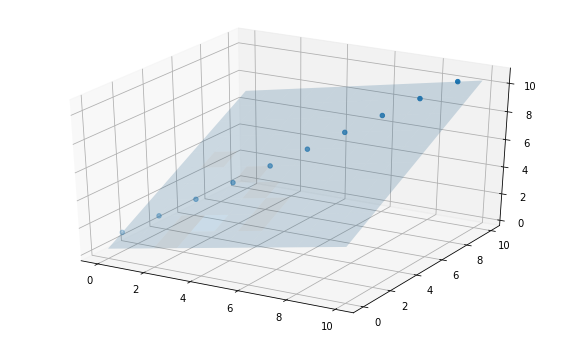

In [79]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, Z, alpha=0.2)
ax.scatter3D(df0.index, df0.colA, df0.colB);

### You can see that the values are perfectly correlated with the index. A plane fit to these data points gives an error of 0.

### Now let's keep the first feature the same, and change the second:

In [50]:
df1 = pd.DataFrame(data={'colA': np.arange(1, 11),
                         'colB': [3, 8, 5, 7, 9, 2, 1, 6, 10, 4]})
df1

,colA,colB
0,1,3
1,2,8
2,3,5
3,4,7
4,5,9
5,6,2
6,7,1
7,8,6
8,9,10
9,10,4


In [80]:
X, Y, Z = best_plane_fit(df1)

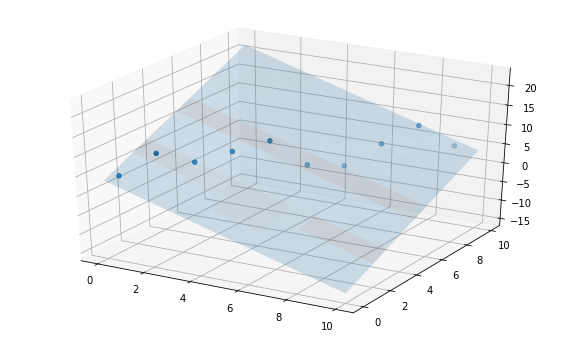

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, Z, alpha=0.2)
ax.scatter3D(df1.index, df1.colA, df1.colB, cmap='Greens');

### Now we can see that the second feature causes the points to be scattered around. They don't lie on a plane anymore. If you fit a plane to this data set, there will be a large error component. This is what a bad feature will do to a good feature. So you should only use features that are good - adding more and more features may cause errors in your model's fit.

## More information on plotting with mplot3d is available at: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## Please note that although we have plotted these points in 3-D space, it is not easy to see where they're located. It is best to avoid 3-D plots in general.  In this case, we needed to show the addition of a feature, so we had to show this 3-D plot.